<h3><b>Table of Content:


<ol>
<li>Introduction/Business Understanding</li>
<li>Analytic Approach</li>
<li>Data Requirements</li>
<li>Data Preparation/Pre-processing</li>
<li>Analysis</li>
<li>Conclusion</li>

<h1><b>1. Introduction/Business Understanding</h1><b1>

<h2><b>1.1 Background</b></h2>
    

Working as a Lead Engineer is quite tiring especially before releases and higher management meetings. Thankfully, I've developed a hobby which let's me unwind and at the same time helps me build a global perspective. As someone who loves travelling, finding ways to save money and travel low-cost is essential. There's little to save while booking flights and I'd rather pay more to traveling comfortably on a 16Hr flight than try to save and wear myself down even before the trip begins! But we can always save a few bucks on accomodation.
    
A hostel is a low-budget accommodation shared among travelers. Staying at hostels is an extremely affordable option for travelers. Not only that, It also gives you a chance to expereince which you would never at a hotel. I've found that experiencing hostel life one of the best ways to travel the world on a budget and here’s why:
<ol>
<li>You'll save a lot of money trust me.</l1>
<li>Meet other like-minded travellers and make new friends around the world!</l2>
<li>Most hostels organize lot of social activites</l2>

<h2>1.2 Problem Description:

Hostel accomodation is a booming industry with the latest rise in tourism worldwide, especially in Asia. Over 20% of the total tourists worldwide are aged between 19-25. And around 80% of them prefer to spend less on accomodation by opting for hostels. This means the demand for hostels is only going to grow further and more people would want to get their legs in the game.

<ul><li>How should a new business person decide where to open a hostel?</li>
<li>What factors should he look at before investing?</li>
<li>Which neighborhood venues affect a user's rating for location of hostel?</li>

At the same time, it is difficult for a travellers, especially first-timers, to select a hostel from among many options. Hostel reviews are subjective and differ from person-to-person and one cannot solely depend on them to make a decision. It is especially important to consider other aspects like price and neighborhood, which can greatly influence one's experience of the city/country. I will try to answer the following questions

<ul><li>How does price vary with location?</li>
<li>Where are the 'value of money' hostels located?</li>
<li>How does proximity to transportation affect hostel rating?</li>
<li>Which hostels are most secure and where are they located?</li>
<li>Suggest similar hostel but which cheaper price</li>

Tourism in Japan in on a rise. It is expected that the number of foreign tourists coming to Japan will be increasing till 2020 when Olympic will be held in Tokyo. Hence, for this project, we will be looking at hostels in Japan, in particular, Tokyo.

<h2>1.3 Target Audience


This project will serve two groups of audience:

<ol><li><b>Travellers:</b> Help them make an informed decision while choosing a hostel by providing an in-depth analysis of hostels and their neighborhood.</li>
<li><b>Business Person:</b> Provide useful information and models which can help them where to open their first/next hostel.</li>

<h1>2. Analytic Approach

I will be taking two approaches in the project.


Firstly, I will use exploratory data analysis(EDA) to uncover hidden properties of data and provide useful insights to the reader, both future traveller and investor.

Secondly, I will use prescriptive analytics to help a business person decide a location for new hostel. I will use clustering (KMeans)

<h1>3. Data Requirements

One city will be analysed in this project : <b>Tokyo</b>

Following are the datasets used in the project along with the reasons for choosing them:

1. [Japan Hostel Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset): This dataset was web scraped from Hostelworld by Koki Ando and is available on Kaggle. This is the core dataset with which I'll work.

2. [Foursquare API](https://developer.foursquare.com/docs/api): This API will help me get the venues around the hostel which I will use for EDA and clustering.

3. [Tokyo Land Price](https://utinokati.com/en/details/land-market-value/area/Tokyo/): I will scrape this website to get land prices of various neighborhoods in Tokyo.

Firstly, I will use the list of hostels from Hostel dataset and use Foursquare API to get venues around the Hostel. I will then use EDA to explore the neighborhood and how it affects the price of the hostel. I will also use the combined dataset to cluster similar hostels as per pricing and neighborhood.


Second, I will combine the above data with the land price for the area in which the Hostel is situated and them develop clustering and regression models to predict where a new hostel should be opened and how much should it be priced at.



<h1>4. Data Preparation/Pre-processing

In [220]:
!pip install folium

In [95]:
!pip install opencage

In [112]:
!pip install time

  ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [5]:
!pip install beautifulsoup4

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy import OpenCage
from sklearn.cluster import KMeans

%matplotlib inline

<h3>4.1. Hostel Dataset:

Let's first deal with hostels datsaet. I will read the first dataset into a dataframe. For ease of access, I've already downloaded the dataset as csv from Kaggle. You can access the same [here](https://www.kaggle.com/koki25ando/hostel-world-dataset)

In [28]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5cacd95e339c4a55beb11dda59e0160a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oWADA1W04i8l9IHs160kf7fyxCWeG7cArErMK7D6i9bT',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5cacd95e339c4a55beb11dda59e0160a.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-j5ntjq9ekqvrrr',Key='Hostel.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

hostel_df = pd.read_csv(body)
hostel_df .head()


,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


We will drop the 1st column and rename other columns to make them more readable.


In [29]:
columns = ['Name', 'City', 'StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
           'RatingCategory', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
           'Security', 'Staff', 'ValueForMoney', 'Longitude', 'Latitude']


In [30]:
hostel_df.drop(['Unnamed: 0'], axis=1, inplace=True)
hostel_df.columns = columns
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [31]:
print("Number of Hostels: ", hostel_df.shape[0])


Number of Hostels:  342


Let's check if any hostels are missing location data since that is essential for our analysis.

In [32]:
print("Num of hostels with missing Longitude: ", hostel_df.Longitude.isna().sum())


Num of hostels with missing Longitude:  44


In [33]:
print("Num of hostels with missing Latitude: ", hostel_df.Latitude.isna().sum())


Num of hostels with missing Latitude:  44


In [34]:
# Remove hostels with missing latitude and longitude 
hostel_df = hostel_df[hostel_df.Longitude.isna() == False]
hostel_df = hostel_df[hostel_df.Latitude.isna() == False]
hostel_df.shape

(298, 15)

If we see the DistanceFromCityCentre column, we see that it has distance as well as text, let's remove the unwanted text.


In [35]:
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.replace(r'[^\d\.]+', '', regex=True)
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's do a final check if any more values are missing and what we want to do about them


In [37]:
hostel_df.count()

Name                      298
City                      298
StartPrice                298
DistanceFromCityCentre    298
OverallScore              298
RatingCategory            298
Atmosphere                298
Cleanliness               298
Facilities                298
Location                  298
Security                  298
Staff                     298
ValueForMoney             298
Longitude                 298
Latitude                  298
dtype: int64

Awesome! No more missing values.
Let's check the if the datatype of each column in proper

In [38]:
hostel_df.dtypes


Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre     object
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [39]:
# Convert DistanceFromCityCentre to float64
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.astype('float')
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre    float64
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [40]:
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's create a new dataframe for tokyo hostels.


In [42]:
tokyo_hostels_df = hostel_df[hostel_df.City == "Tokyo"]


In [43]:
Everything looks good here. Let's move on to fetch neighborhood data using Foursquare API.


SyntaxError: invalid syntax (<ipython-input-43-2ac02d41c990>, line 1)

<h3>4.2 Neighborhood Data(Foursquare):


In [45]:
search_url = 'https://api.foursquare.com/v2/venues/search'
explore_url = 'https://api.foursquare.com/v2/venues/explore'

In [46]:
CLIENT_ID = 'ZVKPBBUCLN1WRF2WDHGBRLX4NGQ5L2TJC2BQKJ01AXUCQJUQ' # your Foursquare ID
CLIENT_SECRET = 'RIS32WD234K3RUCMXWUNXKLC5QEV25LHUGVT5ZWA4DP40PRC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: ZVKPBBUCLN1WRF2WDHGBRLX4NGQ5L2TJC2BQKJ01AXUCQJUQ
CLIENT_SECRET:RIS32WD234K3RUCMXWUNXKLC5QEV25LHUGVT5ZWA4DP40PRC


In [47]:
sample_hotel = hostel_df.loc[0]
sample_hotel.Name

'"Bike & Bed" CharinCo Hostel'

In [48]:
params = dict(
  client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET,
  v=VERSION,
  ll=f"{sample_hotel.Latitude}, {sample_hotel.Longitude}",
  radius=500,
  limit=100,
  sortByPopularity=1
)

In [49]:
def get_recommended_venues(name, lattitude, longitude, limit=100, radius=500):
    venues = []
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=f"{lattitude}, {longitude}",
        radius=radius,
        limit=limit,
        sortByPopularity=1
    )
    data = requests.get(explore_url, params=params).json()['response']['groups'][0]['items']
    for v in data:
        v = v['venue']
        primary_cat = ""
        for c in v['categories']:
            if(c['primary']):
                primary_cat=c['name']
        venues.append({
            'HostelName':name, 
            'VenueName': v['name'], 
            'Category': primary_cat, 
            'VenueLatitue': v['location']['lat'], 
            'VenueLongtitude': v['location']['lng']
        })
    return venues

In [50]:

venue_list = []


In [51]:
for name, lat, long in zip(hostel_df.Name, hostel_df.Latitude, hostel_df.Longitude):
    venue_list.extend(get_recommended_venues(name, lat, long))
    i = len(venue_list)
    print(i)

78
178
257
291
320
379
452
484
521
607
683
738
821
846
878
937
1037
1137
1237
1317
1417
1491
1546
1626
1724
1760
1812
1884
1894
1948
1971
2071
2171
2271
2371
2471
2571
2671
2708
2808
2880
2980
3080
3100
3200
3300
3400
3452
3501
3601
3664
3749
3795
3844
3944
3977
4011
4111
4136
4236
4309
4365
4432
4478
4532
4562
4662
4737
4812
4912
4935
4959
5058
5114
5157
5203
5284
5335
5432
5467
5480
5505
5532
5567
5629
5667
5703
5803
5831
5841
5887
5987
6038
6068
6113
6136
6190
6227
6253
6353
6376
6411
6458
6558
6658
6724
6780
6824
6865
6935
6988
7020
7062
7099
7161
7254
7331
7431
7499
7599
7644
7691
7744
7744
7764
7813
7887
7911
7968
8003
8030
8081
8126
8226
8326
8388
8435
8455
8555
8625
8715
8815
8868
8968
9028
9127
9174
9274
9369
9430
9471
9528
9558
9658
9715
9815
9915
10000
10058
10099
10148
10239
10259
10267
10367
10451
10479
10579
10626
10681
10746
10846
10946
11046
11138
11238
11338
11438
11512
11578
11620
11710
11733
11784
11876
11923
11961
11970
11975
12041
12089
12189
12215
12250
12276
1228

In [52]:
venues_df = pd.DataFrame(venue_list)
venues_df = venues_df.rename(columns={'VenueLatitue': 'VenueLatitude', 'VenueLongtitude': 'VenueLongitude'})
venues_df.head()

,Category,HostelName,VenueLatitude,VenueLongitude,VenueName
0,Hotel,"""Bike & Bed"" CharinCo Hostel",34.681229,135.516472,APA Villa Hotel Osaka-Tanimachi 4-chome Ekimae...
1,Hotel,"""Bike & Bed"" CharinCo Hostel",34.684020,135.510206,City Plaza Osaka (シティプラザ大阪)
2,Fast Food Restaurant,"""Bike & Bed"" CharinCo Hostel",34.683109,135.517443,McDonald's (マクドナルド 地下鉄谷町四丁目店)
3,Event Space,"""Bike & Bed"" CharinCo Hostel",34.683580,135.509319,大阪産業創造館
4,Park,"""Bike & Bed"" CharinCo Hostel",34.685260,135.513810,中大江公園


Let's create a new dataframe for venues for hostels in tokyo.


In [53]:
tokyo_venues_df = venues_df[venues_df.HostelName.isin(tokyo_hostels_df.Name)]


In [54]:
tokyo_venues_df.head()


,Category,HostelName,VenueLatitude,VenueLongitude,VenueName
78,Train Station,&And Hostel Akihabara,35.698357,139.773120,Akihabara Station (秋葉原駅)
79,Electronics Store,&And Hostel Akihabara,35.698713,139.774761,Yodobashi-Akiba (ヨドバシカメラ マルチメディアAkiba)
80,Train Station,&And Hostel Akihabara,35.698818,139.772570,Akihabara Electric Town Exit (秋葉原駅 電気街口)
81,Hobby Shop,&And Hostel Akihabara,35.698364,139.772298,THE IDOLM@STER Official Shop (アイドルマスター オフィシャルシ...
82,Bookstore,&And Hostel Akihabara,35.697324,139.775157,Shosen Book Tower (書泉ブックタワー)


In [55]:
tokyo_venues_df.shape


(8375, 5)

<h3>4.3 Land Price Data(Foursquare):


I will scrape the following URL to get land prices in tokyo - [data](https://utinokati.com/en/details/land-market-value/area/Tokyo/)


In [166]:
land_price_url = 'https://utinokati.com/en/details/land-market-value/area/Tokyo/'

data = BeautifulSoup(requests.get(land_price_url).content)

In [167]:
price_df = pd.read_html(data.find('table', {'class':'table-condensed'}).prettify())[0]


In [168]:
price_df.drop(['#', 'Average Trading Price'], axis=1, inplace=True)
price_df.rename(columns={'Average Unit Price': 'PricePerSqMeter', 'Area': 'Neighborhood'}, inplace=True)
price_df.PricePerSqMeter = price_df.PricePerSqMeter.apply(lambda x: x.strip(' JPY/sq.m').replace(',', '')).astype(int)

In [169]:
price_df.head()


,Neighborhood,PricePerSqMeter
0,Chiyoda-Ku,2602846
1,Chuo-Ku,2688537
2,Minato-Ku,2180846
3,Shinjuku-Ku,940756
4,Bunkyo-Ku,943847


Let's see all the neighborhoods


In [170]:
print(price_df.Neighborhood.sort_values())


20              Adachi-Ku
47            Akiruno-Shi
29           Akishima-Shi
17             Arakawa-Ku
4               Bunkyo-Ku
0              Chiyoda-Ku
30              Chofu-Shi
1                 Chuo-Ku
22             Edogawa-Ku
28              Fuchu-Shi
38              Fussa-Shi
23           Hachioji-Shi
46             Hamura-Shi
42      Higashikurume-Shi
35    Higashimurayama-Shi
40      Higashiyamato-Shi
34               Hino-Shi
45              Inagi-Shi
18            Itabashi-Ku
21          Katsushika-Ku
16                Kita-Ku
41             Kiyose-Shi
33            Kodaira-Shi
32            Koganei-Shi
36          Kokubunji-Shi
39              Komae-Shi
7                 Koto-Ku
52         Kozushima-Mura
37          Kunitachi-Shi
31            Machida-Shi
9               Meguro-Ku
2               Minato-Ku
26             Mitaka-Shi
43    Musashimurayama-Shi
25          Musashino-Shi
13              Nakano-Ku
19              Nerima-Ku
51           Niijima-Mura
49          

Let's remove -ku suffix from all the neighborhood names


In [171]:
price_df.Neighborhood.replace("(Ku)", "", regex=True, inplace=True)


In [172]:
price_df.head()


,Neighborhood,PricePerSqMeter
0,Chiyoda-,2602846
1,Chuo-,2688537
2,Minato-,2180846
3,Shinjuku-,940756
4,Bunkyo-,943847


The hostels dataset doesn't contain information on the locality of the hostel. We'll use reverse geocoding for this purpose. I'm using a free account on OpenCage for this purpose.

We'll try the API with one Hostel and then write function to do the same for all hostels in tokyo.


In [173]:
temp = tokyo_hostels_df.iloc[1]
temp.to_frame().T

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8,7.5,7.5,7.5,7,8,6.5,139.784,35.7127


<h1>5. Analysis

<h3>5.1 Exploratory Data Analysis</h3>
Using EDA, we will try to answer the following questions:
<ul><li>How does price vary with location?</li>
<li>Which hostels are most secure and where are they located?</li>
<li>Where are the 'value of money' hostels located?</li>
<li>How does proximity to transportation affect hostel rating?</li>
Let's first start by analyzing which cities are covered in our dataset

In [174]:
hostel_df.City.value_counts()

Tokyo           116
Osaka            89
Kyoto            66
Fukuoka-City     14
Hiroshima        13
Name: City, dtype: int64

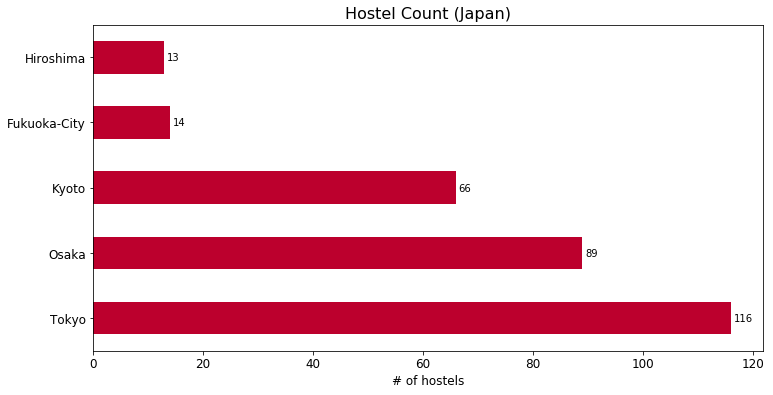

In [175]:
plt.figure(figsize=(12, 6))
ax = hostel_df.City.value_counts().plot(kind="barh", color="#BC002D", fontsize=12)
ax.set_title("Hostel Count (Japan)", fontsize=16)
ax.set_xlabel("# of hostels", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + 0.2))

Tokyo has the most number of hostels which is understandable since it is once of the largest cities of the world and hence might attract a lot of visitors through its airport

In [176]:

tokyo_hostels_df.head()


,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044


In [177]:
tokyo_hostels_df.shape


(116, 15)

Let's visualize all these hostels on the map


In [138]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map
    

<h3>5.1 Exploratory Data Analysis</h3>
Using EDA, we will try to answer the following questions:
<ul><li>How does price vary with location?</li>
<li>Which hostels are most secure and where are they located?</li>
<li>Where are the 'value of money' hostels located?</li>
<li>How does proximity to transportation affect hostel rating?</li>
Let's first start by analyzing which cities are covered in our dataset

<h3>5.2 Clustering

Now, we will cluster the hostels twice. Once depending on the different rating parameters and one based on their neighborhood.
Consider the following case, that a traveller has selected a hostel, but he finds that it is full! What options does he have? He/She can either go for a hostel which is similar in rating and price to the one he/she has selected. Or he/she can consider hostels which boast similar neighborhood to the selected one.
We will help traveller in both cases

<b>5.2.1 Clustering based on rating parameters


In [182]:
X = tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
                      'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
                      'Security', 'Staff', 'ValueForMoney']]

In [183]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [184]:
scores = [get_inertia(x) for x in range(2, 21)]


Text(0, 0.5, 'Error')

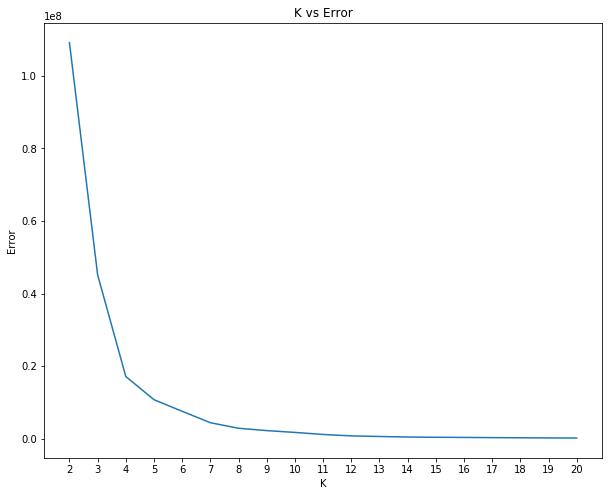

In [185]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

It is evident from the above plot that we have 6 clusters in our data. Let's retrain the model and plot the hostels on the map.


In [188]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [189]:
tokyo_hostels_df['RatingCluster'] = kmeans.labels_

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [190]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, name, cluster in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name, kmeans.labels_):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

Examining Clusters


<h2>Cluster 0

In [191]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 0].describe()


,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,1970.833333,9.062500,8.793750,8.227083,9.008333,8.637500,8.483333,9.079167,9.145833,8.960417,139.775411,35.709619,0.0
std,247.505283,3.105426,0.617616,1.063063,0.954682,0.856918,1.216086,0.672866,0.678534,0.642714,0.040741,0.036577,0.0
min,1300.000000,1.600000,7.000000,4.000000,6.000000,6.000000,4.000000,7.000000,6.500000,6.500000,139.667695,35.526993,0.0
25%,1800.000000,8.175000,8.475000,7.900000,8.875000,8.000000,8.400000,8.800000,8.975000,8.800000,139.774401,35.694801,0.0
50%,2000.000000,9.050000,9.000000,8.200000,9.300000,8.900000,8.900000,9.200000,9.300000,9.000000,139.785415,35.707377,0.0
75%,2200.000000,9.925000,9.125000,8.800000,9.600000,9.025000,9.100000,9.500000,9.525000,9.200000,139.796004,35.723864,0.0
max,2300.000000,18.100000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.863871,35.807266,0.0


Traits: Very High Cost. Close to City center. Very high cleaniness and security ratings


<H2>Cluster 4

In [192]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 4].describe()


,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,3575.000000,7.108333,8.829167,8.304167,9.154167,8.608333,8.679167,8.854167,9.316667,8.850000,139.741775,35.677897,4.0
std,299.637462,4.366266,0.614661,0.967057,0.924535,0.984628,0.646044,1.040894,0.653197,0.844419,0.036233,0.055297,0.0
min,3200.000000,1.400000,6.800000,6.000000,6.700000,6.000000,7.300000,6.000000,7.300000,6.700000,139.679436,35.548044,4.0
25%,3300.000000,4.150000,8.675000,7.975000,8.975000,8.075000,8.000000,8.675000,9.000000,8.475000,139.708332,35.669754,4.0
50%,3600.000000,6.750000,9.000000,8.150000,9.450000,9.000000,8.800000,9.000000,9.300000,8.950000,139.740441,35.698227,4.0
75%,3800.000000,9.200000,9.225000,9.025000,9.750000,9.300000,9.150000,9.600000,10.000000,9.350000,139.776128,35.711630,4.0
max,4100.000000,16.500000,9.500000,10.000000,10.000000,10.000000,9.700000,10.000000,10.000000,10.000000,139.794981,35.734676,4.0


Traits: High Cost, On avg 7km of City center. All ratings moderately high

Now suppose that I want to stay at Retrometro Backpackers. However, when I go to book, it shows that it doesn't have any spots available! Fortunately, I can now use the cluster result to find a hostel similar to Retrometro Backpackers. Let's see what options do I have!


In [193]:
tokyo_hostels_df[tokyo_hostels_df.Name.str.contains("Retrometro")]


,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157,2


Retrometro Backpackers' RatingCluster is 5. Let's see what options do I have!


In [194]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 2].sort_values(['OverallScore'], ascending=False)[:5]


,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
134,Hostel Chapter Two Tokyo,Tokyo,2700,9.8,10.0,Superb,10.0,10.0,10.0,10.0,10.0,10.0,10.0,139.797217,35.709305,2
132,Hostel bedgasm,Tokyo,2900,9.5,9.6,Superb,9.6,9.8,9.6,9.1,9.5,9.9,9.7,139.789033,35.721350,2
204,Khaosan Tokyo Origami,Tokyo,2500,10.0,9.5,Superb,8.9,9.7,9.6,9.4,9.7,9.7,9.4,139.797381,35.716340,2
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157,2
55,CITAN Hostel,Tokyo,2500,8.1,9.4,Superb,9.3,9.8,9.5,9.1,9.5,9.6,9.3,139.781352,35.691571,2


Fortunately I can book a bed at Hostel bedgasm! It is similarly priced and rated as Retrometro Backpackers!
We can do the same for the other 5 clusters as well, but we are not doing that now.

<H2>5.2.2 Clustering based on neighborhood


Now, we will cluster the same hostels. But this time, we will not use ratings or price instead we will use the neighborhood data and see which hostels have similar surroundings. Some travellers focus more on the location of a place rather than the price or ratings. This can be useful for them.

In [195]:
category_1hot = pd.get_dummies(tokyo_venues_df.Category)
category_1hot['HostelName'] = tokyo_venues_df.HostelName

# move neighborhood column to the first column
fixed_columns = [category_1hot.columns[-1]] + list(category_1hot.columns[:-1])
category_1hot = category_1hot[fixed_columns]
category_1hot.head()

,HostelName,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Wagashi Place,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
78,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
category_1hot.shape

(8375, 287)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.


In [197]:
category_1hot = category_1hot.groupby('HostelName').mean().reset_index()
category_1hot.head()

,HostelName,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Wagashi Place,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,&And Hostel Akihabara,0.000000,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.01,0.0,0.000000,0.0,0.010000,0.0,0.0
1,&And Hostel Ueno,0.000000,0.0,0.00,0.012658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.012658,0.0,0.012658,0.0,0.0
2,&And Hostel-Asakusa North-,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0
3,1night1980hostel Tokyo,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.034483,0.0,0.0
4,328 Hostel & Lounge,0.016949,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0


Let's see few Hostels along with the top 5 most common venues

In [199]:
num_top_venues = 5

for nbrhood in category_1hot.HostelName[:5]:
    print("---- "+nbrhood+" ----")
    temp = category_1hot[category_1hot.HostelName == nbrhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- &And Hostel Akihabara ----
                 venue  freq
0             Sake Bar  0.16
1     Ramen Restaurant  0.06
2  Japanese Restaurant  0.05
3      Soba Restaurant  0.04
4   Chinese Restaurant  0.04


---- &And Hostel Ueno ----
               venue  freq
0  Convenience Store  0.18
1   Ramen Restaurant  0.10
2    Soba Restaurant  0.05
3              Hotel  0.05
4        Coffee Shop  0.05


---- &And Hostel-Asakusa North- ----
               venue  freq
0  Convenience Store  0.24
1              Hotel  0.18
2             Hostel  0.06
3      Grocery Store  0.06
4           Sake Bar  0.06


---- 1night1980hostel Tokyo ----
               venue  freq
0  Convenience Store  0.21
1           Sake Bar  0.10
2      Grocery Store  0.10
3             Hostel  0.10
4    Bed & Breakfast  0.07


---- 328 Hostel & Lounge ----
                 venue  freq
0    Convenience Store  0.14
1     Ramen Restaurant  0.10
2             Bus Stop  0.07
3                Hotel  0.07
4  Japanese Restaurant  0.07

Let's put that into a pandas dataframe¶


In [200]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [201]:
indicators = ['st', 'nd', 'rd']
num_top_venues = 10

# create columns according to number of top venues
columns = ['HostelName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nbr_venues_sorted_df = pd.DataFrame(columns=columns)
nbr_venues_sorted_df['HostelName'] = category_1hot.HostelName

for ind in np.arange(category_1hot.shape[0]):
    nbr_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(category_1hot.iloc[ind, :], num_top_venues)

nbr_venues_sorted_df.head()

,HostelName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,&And Hostel Akihabara,Sake Bar,Ramen Restaurant,Japanese Restaurant,Soba Restaurant,Chinese Restaurant,Café,Japanese Curry Restaurant,Hobby Shop,BBQ Joint,Juice Bar
1,&And Hostel Ueno,Convenience Store,Ramen Restaurant,Soba Restaurant,Coffee Shop,Hotel,Japanese Restaurant,Chinese Restaurant,Café,Motorcycle Shop,Motel
2,&And Hostel-Asakusa North-,Convenience Store,Hotel,Sake Bar,Grocery Store,Bed & Breakfast,Hostel,Unagi Restaurant,Nabe Restaurant,Bus Stop,Outdoor Sculpture
3,1night1980hostel Tokyo,Convenience Store,Hostel,Grocery Store,Sake Bar,Bed & Breakfast,Japanese Restaurant,Steakhouse,Ramen Restaurant,Café,Soba Restaurant
4,328 Hostel & Lounge,Convenience Store,Ramen Restaurant,Bus Stop,Japanese Restaurant,Hotel,Chinese Restaurant,Platform,Café,Intersection,Sake Bar


In [202]:
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [203]:
nbr_venues_sorted_df['Cluster'] = kmeans.labels_
nbr_venues_sorted_df.rename(columns={'HostelName': 'Name'}, inplace=True)

In [204]:
tokyo_hostels_df_merged = pd.merge(tokyo_hostels_df, nbr_venues_sorted_df, on='Name')
tokyo_hostels_df_merged.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,...,Ramen Restaurant,Japanese Restaurant,Soba Restaurant,Chinese Restaurant,Café,Japanese Curry Restaurant,Hobby Shop,BBQ Joint,Juice Bar,3
1,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,...,Ramen Restaurant,Soba Restaurant,Coffee Shop,Hotel,Japanese Restaurant,Chinese Restaurant,Café,Motorcycle Shop,Motel,0
2,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,...,Hotel,Sake Bar,Grocery Store,Bed & Breakfast,Hostel,Unagi Restaurant,Nabe Restaurant,Bus Stop,Outdoor Sculpture,4
3,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,...,Hostel,Grocery Store,Sake Bar,Bed & Breakfast,Japanese Restaurant,Steakhouse,Ramen Restaurant,Café,Soba Restaurant,4
4,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,...,Ramen Restaurant,Bus Stop,Japanese Restaurant,Hotel,Chinese Restaurant,Platform,Café,Intersection,Sake Bar,5


Finally, let's visualize the resulting clusters

In [205]:
# create map
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_hostels_df_merged['Latitude'], tokyo_hostels_df_merged['Longitude'], tokyo_hostels_df_merged['Name'], tokyo_hostels_df_merged['Cluster']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.7).add_to(tokyo_map)

In [206]:
tokyo_map

<b>Examine Clusters


<b>Cluster 0

In [208]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 0, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
1,&And Hostel Ueno,Soba Restaurant,Coffee Shop,Hotel,Japanese Restaurant,Chinese Restaurant,Café,Motorcycle Shop,Motel,0
5,Ace Inn Shinjuku,Ramen Restaurant,BBQ Joint,Japanese Restaurant,Bar,Indian Restaurant,Café,Chinese Restaurant,Tonkatsu Restaurant,0
9,Anne Hostel Asakusabashi,Yoshoku Restaurant,Nabe Restaurant,Bar,Café,Steakhouse,Chinese Restaurant,Thai Restaurant,Japanese Restaurant,0
11,ARTnSHELTER,Ramen Restaurant,Park,Canal,Intersection,American Restaurant,Fried Chicken Joint,Yoshoku Restaurant,Food & Drink Shop,0
21,Bunka Hostel Tokyo,Hotel,Japanese Restaurant,Coffee Shop,Unagi Restaurant,Dessert Shop,Wagashi Place,Yoshoku Restaurant,Shopping Mall,0


In [209]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 0]['1st Most Common Venue'].value_counts()

Convenience Store      15
Ramen Restaurant        8
Sake Bar                6
Café                    3
Japanese Restaurant     3
Zoo Exhibit             1
Yoshoku Restaurant      1
Hotel                   1
Intersection            1
Soba Restaurant         1
Name: 1st Most Common Venue, dtype: int64

<h3>1st Cluster Properties: Restaurants and Coffee Shops


In [210]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 1, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
98,Tokyo Central Youth Hostel,Sake Bar,BBQ Joint,French Restaurant,Yakitori Restaurant,Convenience Store,Chinese Restaurant,Coffee Shop,Okonomiyaki Restaurant,1


In [211]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 1]['1st Most Common Venue'].value_counts()

Japanese Restaurant    1
Name: 1st Most Common Venue, dtype: int64

<h3>2nd Cluster Properties: Convenience Stores

In [214]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 2, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
75,Nihonbashi Muromachi BAY HOTEL,Coffee Shop,BBQ Joint,French Restaurant,Soba Restaurant,Japanese Restaurant,Dessert Shop,Bar,Hotel,2
94,Tadaima Japan Shinjuku Ryokan,Sake Bar,BBQ Joint,Grocery Store,Café,Restaurant,Donburi Restaurant,Rock Club,Burger Joint,2
95,The Millennials Shibuya,Coffee Shop,Tonkatsu Restaurant,Record Shop,Japanese Restaurant,Furniture / Home Store,Concert Hall,Rock Club,Hobby Shop,2
107,Uno Ueno,Ramen Restaurant,BBQ Joint,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Café,Bed & Breakfast,Pub,2
110,Wise Owl Hostels Shibuya,Italian Restaurant,Ramen Restaurant,Restaurant,BBQ Joint,Soba Restaurant,Chinese Restaurant,Sake Bar,Pizza Place,2


<h3>3rd Cluster Neighborhood: Baseball Field and Gym Pool


In [216]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 3, tokyo_hostels_df_merged.columns[[0] + list(range(18, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,&And Hostel Akihabara,Japanese Restaurant,Soba Restaurant,Chinese Restaurant,Café,Japanese Curry Restaurant,Hobby Shop,BBQ Joint,Juice Bar,3
14,Asakusa Ryokan Toukaisou,Ramen Restaurant,Convenience Store,Hostel,Café,Japanese Restaurant,Unagi Restaurant,Chinese Restaurant,Wagashi Place,3
16,Astro Station,Japanese Restaurant,Sake Bar,Café,Beer Bar,Music Venue,Tonkatsu Restaurant,Chinese Restaurant,Steakhouse,3
18,Beagle Tokyo Hostel & Apartments,Park,Bus Stop,Sake Bar,Restaurant,Donburi Restaurant,Hotel,Chinese Restaurant,Motorcycle Shop,3
19,Book And Bed Tokyo Asakusa,Café,Unagi Restaurant,Coffee Shop,Hotel,Wagashi Place,Yoshoku Restaurant,Shopping Mall,Soba Restaurant,3


<h3>4th Cluster Neighborhood: Bar and Restaurants

<h1>6. Conclusion

We got a glimpse of the hostel scene in Tokyo and were able to find out some interesting insights which might be useful to travellers as well as people with business interests. Let's summarize our findings:

<ul><li>Most hostels are located in Taito-ku and Chuo-ku.
<li>Sumita-ku seems to be an interesting locality since it is close to Taito-ku and 43% cheaper than Taito-ku.</li>
<li>The starting price of hostels does not vary much depending on its distance from the city center.</li>
<li>Most of the hostels rated high for their security are in Katsushika, Kita, Meguro, Shibuya and Shinagawa</li>
<li>Proximity to a mode of transportation or a historic site positively affects the hostel rating.</li>
<li>Hostels rated highly for being value for money are comparatively cheaper and are located away from the city center</li>